In [1]:
from google.colab import files
uploaded = files.upload()

Saving hotel_bookings.csv to hotel_bookings (1).csv


needed imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from scipy.stats import iqr

In [3]:
df = pd.read_csv('hotel_bookings.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


agent and company are two columns with null values

Phase 1: Exploratory Data Analysis (EDA)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

Statistics

In [5]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


heatmap for missing values

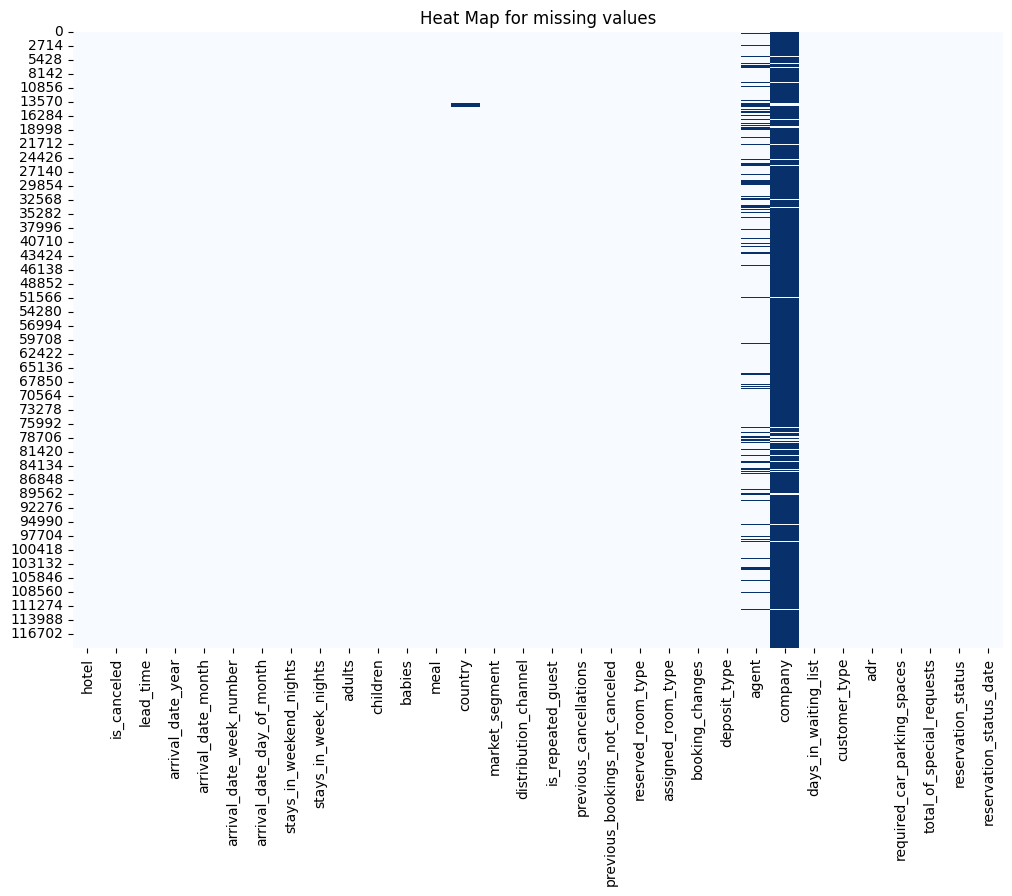

In [6]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar= False, cmap='Blues')
plt.title("Heat Map for missing values")
plt.show()

Detect outliers in key numerical columns (adr and lead_time)

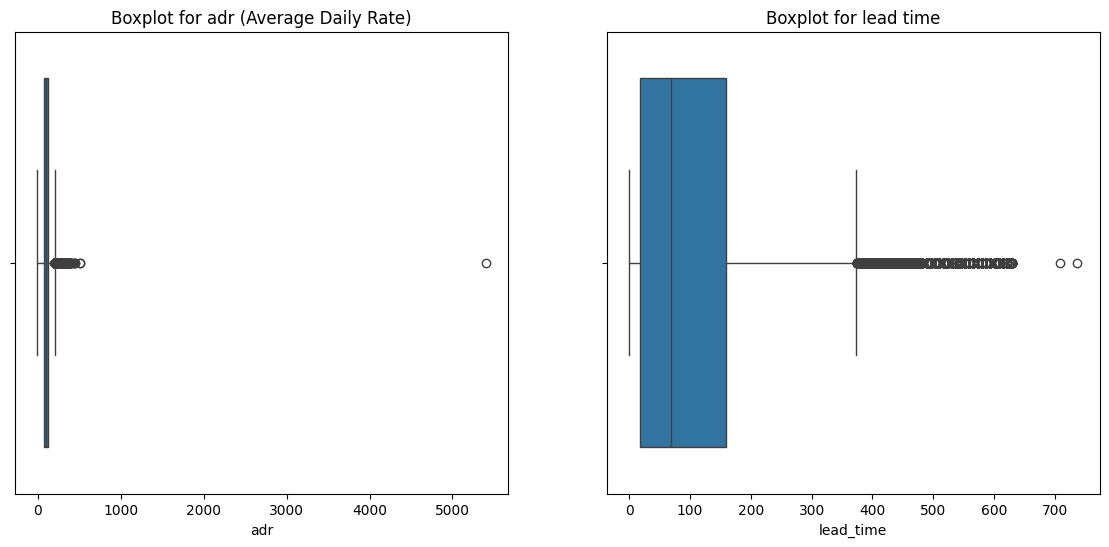

In [7]:
plt.figure(figsize=(14,6))
#for adr
plt.subplot(1,2,1)
sns.boxplot(x=df['adr'])
plt.title("Boxplot for adr (Average Daily Rate)")

#for lead_time
plt.subplot(1,2,2)
sns.boxplot(x=df['lead_time'])
plt.title("Boxplot for lead time")
plt.show()

detecting outliers using IQR method

In [8]:
#outlier in adr
Q1_adr = df['adr'].quantile(0.25)
Q3_adr = df['adr'].quantile(0.75)
IQR_adr = Q3_adr - Q1_adr
lower_bound_adr = Q1_adr - 1.5*IQR_adr
upper_bound_adr = Q3_adr + 1.5*IQR_adr
outlier_adr = df[(df['adr'] < lower_bound_adr) | (df['adr'] > upper_bound_adr)].shape[0]
print(f"Number of outliers in adr: {outlier_adr}")

#outlier in lead time
Q1_lead_time = df['lead_time'].quantile(0.25)
Q3_lead_time = df['lead_time'].quantile(0.75)
IQR_lead_time = Q3_lead_time - Q1_lead_time
lower_bound_lead_time = Q1_lead_time - 1.5*IQR_lead_time
upper_bound_lead_time = Q3_lead_time + 1.5*IQR_lead_time
outlier_lead_time = df[(df['lead_time'] < lower_bound_adr) | (df['lead_time'] > upper_bound_adr)].shape[0]
print(f"Number of outliers in lead_time: {outlier_lead_time}")

Number of outliers in adr: 3793
Number of outliers in lead_time: 18786


Phase 2: Data Cleaning

In [9]:
#handling missing values
df['company'].fillna(0)
df['agent'].fillna(0)
df['country'].fillna('Unknown')
df['children'].fillna(df['children'].median())

,children
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
119385,0.0
119386,0.0
119387,0.0
119388,0.0


Removing duplicates

In [10]:
print(f"data before removing duplicates:{df.shape}")
df_without_duplicates = df.drop_duplicates()
print(f"data after removing duplicates:{df_without_duplicates.shape}")

data before removing duplicates:(119390, 32)
data after removing duplicates:(87396, 32)


Chosen Method: Capping -> Any value above a threshold (1000) is replaced with 1000.
This keeps the data distribution intact while reducing skew.

Handling outliers

In [11]:
df['adr'] = df['adr'].clip(upper=1000)

In [12]:
df['reservation_status_date'].head()

,reservation_status_date
0,2015-07-01
1,2015-07-01
2,2015-07-02
3,2015-07-02
4,2015-07-03


In [13]:
df['date_parsed'] = pd.to_datetime(df['reservation_status_date'], format="%Y-%m-%d")
df['date_parsed'].head()


,date_parsed
0,2015-07-01
1,2015-07-01
2,2015-07-02
3,2015-07-02
4,2015-07-03


Phase 3: Feature Engineering & Preprocessing

In [14]:
# Create new features
df['total_guests'] = df['adults'] + df['children'] + df['babies']
df['total_nights'] = df['stays_in_week_nights'] + df['stays_in_week_nights']
df['is_family'] = ((df['children'] + df['babies']) > 0).map({True: "Yes", False: "No"})


In [15]:
df['total_guests'].head()

,total_guests
0,2.0
1,2.0
2,1.0
3,1.0
4,2.0


In [16]:
df['total_nights'].head()

,total_nights
0,0
1,0
2,2
3,2
4,4


In [17]:
df['is_family'].head()

,is_family
0,No
1,No
2,No
3,No
4,No


In [18]:
#Encode Categorical Variables:
# One-hot encode low-cardinality features
df = pd.get_dummies(df, columns=['meal', 'market_segment'])

# Frequency encoding
country_counts = df['country'].value_counts()
df['country_freq'] = df['country'].map(country_counts)

In [19]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,meal_Undefined,market_segment_Aviation,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,market_segment_Undefined,country_freq
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,False,False,False,False,True,False,False,False,False,48590.0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,False,False,False,False,True,False,False,False,False,48590.0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,False,False,False,False,True,False,False,False,False,12129.0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,False,False,False,True,False,False,False,False,False,12129.0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,False,False,False,False,False,False,False,True,False,12129.0


In [20]:
# Remove data leakage columns
df = df.drop(['reservation_status', 'reservation_status_date'], axis=1)
print("reservation_status and reservation_status_date columns removed.")

reservation_status and reservation_status_date columns removed.


In [21]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,meal_Undefined,market_segment_Aviation,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,market_segment_Undefined,country_freq
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,False,False,False,False,True,False,False,False,False,48590.0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,False,False,False,False,True,False,False,False,False,48590.0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,False,False,False,False,True,False,False,False,False,12129.0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,False,False,False,True,False,False,False,False,False,12129.0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,False,False,False,False,False,False,False,True,False,12129.0


In [22]:
#Final Preparation: Split your cleaned dataset into training and testing sets
#Define features (X) and target (y)
X = df.drop('is_canceled', axis=1)
y = df['is_canceled']

#split to test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 42)